In [ ]:
#!pip install numpy plotly

In [1]:
import numpy as np
import math as m
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown
import matplotlib.pyplot as plt

d            = 19.05e-3
r            = d/2
A            = m.pi * r**2
Voc          = 4.16e3
i            = 10e3
freq         = 60
gap          = 32e-3
dist         = 609.6e-3
largura      = 610e-3
altura       = 610e-3
profundidade = 254e-3

Markdown(f"""
Parâmetro            | Valor              | Unidade
:--------------------|:-------------------|:-------
Diâmetro             | {d*1e3}            | $mm$
Raio                 | {r*1e3}            | $mm$
Área                 | {A:.4e}            | $m^2$
Voc                  | {Voc/1e3}          | $kV_{{RMS}}$
Icc                  | {i/1e3}            | $kA_{{RMS}}$
Frequência           | {freq}             | $Hz$
Gap                  | {gap*1e3}          | $mm$
Distância de trabalho| {dist*1e3}         | $mm$
Largura              | {largura*1e3}      | $mm$
Altura               | {altura*1e3}       | $mm$
Profundidade         | {profundidade*1e3} | $mm$
""")



Parâmetro            | Valor              | Unidade
:--------------------|:-------------------|:-------
Diâmetro             | 19.05            | $mm$
Raio                 | 9.525            | $mm$
Área                 | 2.8502e-04            | $m^2$
Voc                  | 4.16          | $kV_{RMS}$
Icc                  | 10.0            | $kA_{RMS}$
Frequência           | 60             | $Hz$
Gap                  | 32.0          | $mm$
Distância de trabalho| 609.6         | $mm$
Largura              | 610.0      | $mm$
Altura               | 610.0       | $mm$
Profundidade         | 254.0 | $mm$


## Cálculos

*   **Densidade de Corrente**:  $ J = \frac{i}{A}$


In [2]:
J = i/A

Markdown(f"""
## Cálculos

Parâmetro             | Equação              | Valor   | Unidade
:---------------------|:---------------------|:--------|:---------
Densidade de Corernte | $J=\\frac{{i}}{{A}}$ | {J:.4e} | $\\frac{{A}}{{m^2}}$
""")


## Cálculos

Parâmetro             | Equação              | Valor   | Unidade
:---------------------|:---------------------|:--------|:---------
Densidade de Corernte | $J=\frac{i}{A}$ | 3.5085e+07 | $\frac{A}{m^2}$


In [3]:
pontos = 1667
# step = None 
step = 1e-9
ciclos = 1/4

T    = 1/freq

pontos = pontos   if not step else T/step
step   = T/pontos if not step else step

t = np.arange(0, ciclos*T, step)

Markdown(f"""
Pontos/ciclo  | Passo       | Ciclos      | Total de passos | Tempo
:-------------|:------------|:------------|:----------------|:------
{pontos:.0f}  | {step:.2g}  |{ciclos:.2f} | {len(t)}        | {t[-1]:.4f}
""")


Pontos/ciclo  | Passo       | Ciclos      | Total de passos | Tempo
:-------------|:------------|:------------|:----------------|:------
16666667  | 1e-09  |0.25 | 4166667        | 0.0042


In [ ]:
# Plot do gráfico de corrente

ia = i * np.cos(2*np.pi*freq*t)
ib = i * np.cos(2*np.pi*freq*t - 2*np.pi/3)
ic = i * np.cos(2*np.pi*freq*t + 2*np.pi/3)

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=ia, name="$I_A$", mode="lines+markers"))
fig.add_trace(go.Scatter(x=t, y=ib, name="$I_B$", mode="lines+markers"))
fig.add_trace(go.Scatter(x=t, y=ic, name="$I_C$", mode="lines+markers"))
fig.update_layout(title=f"Corrente elétrica de 0 à {ciclos*T:.4f}s",
                  title_x=0.5,
                  legend_title_text="Correntes",
                  yaxis=dict(exponentformat="SI", title="Corrente (A)"),
                  xaxis=dict(exponentformat="SI", title="Tempo (s)"))

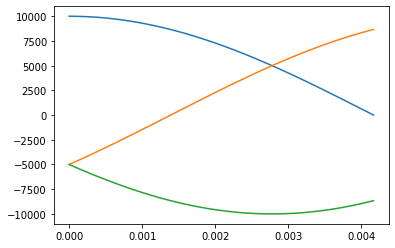

In [6]:
ia = i * np.cos(2*np.pi*freq*t)
ib = i * np.cos(2*np.pi*freq*t - 2*np.pi/3)
ic = i * np.cos(2*np.pi*freq*t + 2*np.pi/3)

plt.plot(t, ia)
plt.plot(t, ib)
plt.plot(t, ic)
plt.show()